# Baseline

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/82492749123082/farich-pics/blob/dev/notebooks/Baseline.ipynb)

## Colab settings

### Turn on GPU

`Runtime` -> `Change runtime type` -> `Hardware accelerator` -> `GPU` -> `Save`

### How to upload file on google colaboratory (from google drive)

Original article [there](https://buomsoo-kim.github.io/colab/2018/04/16/Importing-files-from-Google-Drive-in-Google-Colab.md)

In [0]:
id_url = "1qEYzNSo0EBhU0XfxputYvXxBFJ-CZ5OX" #Enter your id of google drive document

In [2]:
!pip install PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':id_url})

In [0]:
downloaded.GetContentFile('downloaded.root')

Now you have this file in your folder on colab

## Starting point

In [8]:
!pip install uproot #for colab

     |████████████████████████████████| 122kB 9.5MB/s 
     |████████████████████████████████| 92kB 13.9MB/s 


In [0]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
f = uproot.open('downloaded.root')['raw_data']

In [56]:
uproot.open('downloaded.root')['raw_data'].allkeys()

[b'event',
 b'id_event',
 b'id_primary',
 b'pos_primary',
 b'pos_primary._2',
 b'pos_primary._1',
 b'pos_primary._0',
 b'dir_primary',
 b'dir_primary._2',
 b'dir_primary._1',
 b'dir_primary._0',
 b'hits',
 b'hits.id_pmt',
 b'hits.id_chip',
 b'hits.id_layer',
 b'hits.id_track',
 b'hits.id_track_parent',
 b'hits.id_hit',
 b'hits.id_fit',
 b'hits.wavelength',
 b'hits.time',
 b'hits.pos_exact._2',
 b'hits.pos_exact._1',
 b'hits.pos_exact._0',
 b'hits.pos_chip._2',
 b'hits.pos_chip._1',
 b'hits.pos_chip._0',
 b'hits.pos_vertex._2',
 b'hits.pos_vertex._1',
 b'hits.pos_vertex._0',
 b'hits.dir_vertex._2',
 b'hits.dir_vertex._1',
 b'hits.dir_vertex._0',
 b'hits.theta.first',
 b'hits.theta.second',
 b'hits.phi.first',
 b'hits.phi.second']

In [35]:
f.pandas.df()

id_event  id_primary  ...  hits.phi.first  hits.phi.second
entry subentry                        ...                                 
0     0                1        -211  ...             0.0              0.0
      1                1        -211  ...             0.0              0.0
      2                1        -211  ...             0.0              0.0
      3                1        -211  ...             0.0              0.0
      4                1        -211  ...             0.0              0.0
...                  ...         ...  ...             ...              ...
49999 49           50000        -211  ...             0.0              0.0
      50           50000        -211  ...             0.0              0.0
      51           50000        -211  ...             0.0              0.0
      52           50000        -211  ...             0.0              0.0
      53           50000        -211  ...             0.0              0.0

[993407 rows x 34 columns]

In [67]:
df = f.pandas.df(branches=['hits.pos_chip*'])
df.groupby('entry').agg({'hits.pos_chip._2' : 'count'})

,hits.pos_chip._2
entry,
0,41
2,39
3,43
4,41
8,36
...,...
49989,42
49990,44
49993,40


In [69]:
df[['hits.pos_chip._0', 'hits.pos_chip._1']].loc[2]

,hits.pos_chip._0,hits.pos_chip._1
subentry,,
0,-85.12,129.36
1,-85.12,205.68
2,-57.44,118.48
3,-49.92,-95.44
4,-29.76,-82.00
5,-39.84,-30.00
6,-36.48,-33.36
7,-36.48,-36.72
8,-36.48,-40.08


In [0]:
x = df['hits.pos_chip._0'].loc[3]
y = df['hits.pos_chip._1'].loc[3]
xedges = np.linspace(-100, 100, 200)
yedges = np.linspace(-100, 100, 200)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))

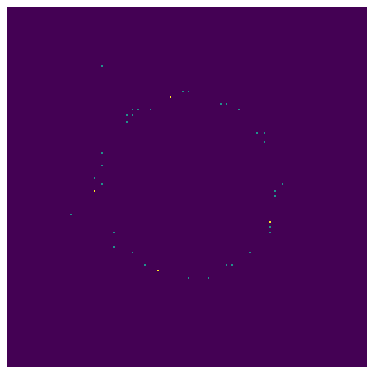

In [221]:
fig = plt.figure(frameon=False, figsize=(5, 5) )
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)
fig.savefig('data.png', dpi=40) #real figure size = figsize*dpi

In [0]:
import cv2
from google.colab.patches import cv2_imshow

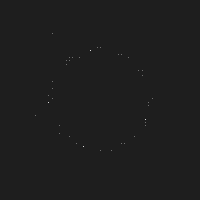

Circle center 100 100


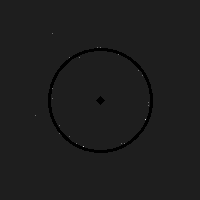

In [223]:
img = cv2.imread('data.png')
# img = cv2.medianBlur(img,1)
cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(cimg)
for i in range(2, 200):
  circles = cv2.HoughCircles(cimg, cv2.HOUGH_GRADIENT, i*0.1, 100)
  try:
    len(circles)
    break
  except:
    continue
# print( len(circles) )
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    print('Circle center', i[0], i[1] )
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)